# Veri Hazırlama

Kütüphaneler

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision
import os
import pandas as pd
from torch.utils.data import (Dataset, DataLoader)
from skimage import io
import time

import warnings

warnings.filterwarnings("ignore")


In [4]:
torch.cuda.is_available()

True

Veri

In [5]:
class veri(Dataset):
    def __init__(self, csv_file, root_dir, transform=None):
        self.annotations = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.annotations)

    def __getitem__(self, index):
        img_path = os.path.join(self.root_dir, self.annotations.iloc[index, 0])
        image = io.imread(img_path)
        y_label = torch.tensor(int(self.annotations.iloc[index, 1]))

        if self.transform:
            image = self.transform(image)

        return(image, y_label)


Veri Hazırlama

In [6]:

dataset = veri(csv_file=r"../../veriler/f1_classification/f111.csv", root_dir=r"../../veriler/f1_classification", transform=transforms.Compose([

    transforms.ToTensor(),
    transforms.Resize(size=(28, 28)),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
]))


In [7]:
dataset


Veri Ön İşleme

In [8]:
train_set, test_set = torch.utils.data.random_split(dataset, [200, 79])
train_loader = DataLoader(dataset=train_set, batch_size=1, shuffle=False)
test_loader = DataLoader(dataset=test_set, batch_size=1, shuffle=False)


In [9]:
train_set


In [10]:
test_set


Veri Görselleştirme

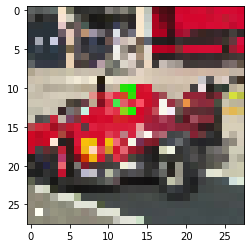

Ferrari
torch.Size([1, 3, 28, 28])


In [11]:
import matplotlib.pyplot as plt
import numpy as np
batch_size = 1

classes = ["Ferrari", "Mclaren", "Mercedes", "Redbull"]


def imshow(img):

    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


dataiter = iter(train_loader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))

print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))
print(images.size())


Model Mimarisini Oluşturma

In [12]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        self.conv1 = nn.Conv2d(
            in_channels=3,  out_channels=4,  kernel_size=(5, 5))
        self.conv2 = nn.Conv2d(
            in_channels=4,  out_channels=8,  kernel_size=(3, 3))
        self.conv3 = nn.Conv2d(
            in_channels=8,  out_channels=16, kernel_size=(2, 2))
        self.conv4 = nn.Conv2d(
            in_channels=16, out_channels=32, kernel_size=(2, 2))

        self.max = nn.MaxPool2d(kernel_size=(2, 2))
        self.func = nn.ELU()
        self.func1 = nn.ReLU()

        self.fullyconnect1 = nn.Linear(in_features=32, out_features=50)
        self.fullyconnect2 = nn.Linear(in_features=50, out_features=50)
        self.fullyconnect3 = nn.Linear(in_features=50, out_features=100)
        self.fullyconnect4 = nn.Linear(in_features=100, out_features=4)

    def forward(self, x):

        x = self.conv1(x)
        x = self.func(x)
        x = self.max(x)

        x = self.conv2(x)
        x = self.func(x)
        x = self.max(x)

        x = self.conv3(x)
        x = self.func(x)
        x = self.max(x)

        x = self.conv4(x)
        x = self.func(x)
        
        x = x.view(x.size(0), -1)  # flaten
        
        x = self.fullyconnect1(x)
        x = self.func(x)
        x = self.fullyconnect2(x)
        x = self.func(x)
        x = self.fullyconnect3(x)
        x = self.func(x)
        
        x = self.fullyconnect4(x)
        
        return x


Modelin Eğitimi

In [13]:
start = time.time()

model = Net()

optimizer = torch.optim.Adamax(model.parameters(), lr=0.001)
error = torch.nn.CrossEntropyLoss()
epoch = 10

for i in range(epoch):
    for j, (images, label) in enumerate(train_loader):

        optimizer.zero_grad()
        out = model(images)
        loss = error(out, label)

        loss.backward()
        optimizer.step()

        print("Epoch [{}/{}, loss:{:.4f}]".format(i+1, j+1, loss.item()))

end = time.time()
print("Süre", end-start)


Epoch [1/1, loss:1.4510]
Epoch [1/2, loss:1.4412]
Epoch [1/3, loss:1.4205]
Epoch [1/4, loss:1.3475]
Epoch [1/5, loss:1.4528]
Epoch [1/6, loss:1.4545]
Epoch [1/7, loss:1.3372]
Epoch [1/8, loss:1.3345]
Epoch [1/9, loss:1.3719]
Epoch [1/10, loss:1.3689]
Epoch [1/11, loss:1.4397]
Epoch [1/12, loss:1.3186]
Epoch [1/13, loss:1.4424]
Epoch [1/14, loss:1.3577]
Epoch [1/15, loss:1.4351]
Epoch [1/16, loss:1.4324]
Epoch [1/17, loss:1.4163]
Epoch [1/18, loss:1.4073]
Epoch [1/19, loss:1.4752]
Epoch [1/20, loss:1.4782]
Epoch [1/21, loss:1.3266]
Epoch [1/22, loss:1.3337]
Epoch [1/23, loss:1.4794]
Epoch [1/24, loss:1.3321]
Epoch [1/25, loss:1.3939]
Epoch [1/26, loss:1.4755]
Epoch [1/27, loss:1.3271]
Epoch [1/28, loss:1.3178]
Epoch [1/29, loss:1.4730]
Epoch [1/30, loss:1.4743]
Epoch [1/31, loss:1.3640]
Epoch [1/32, loss:1.4144]
Epoch [1/33, loss:1.3050]
Epoch [1/34, loss:1.4201]
Epoch [1/35, loss:1.3683]
Epoch [1/36, loss:1.4622]
Epoch [1/37, loss:1.4605]
Epoch [1/38, loss:1.2999]
Epoch [1/39, loss:1.3

Modelin Testi

In [14]:
def dogruluk (loader, model):
    num_correct = 0
    num_samples = 0
    model.eval()  # test modu 

    with torch.no_grad(): # gradient (türev hesaplama)
        for x,y in loader:
            tahmin = model(x) # images
            _,pred = tahmin.max(1)
            num_correct += (pred==y).sum()
            num_samples += (pred.size(0))

        print(f"Got {num_correct} / {num_samples} with accuracy {float(num_correct) / float(num_samples) * 100:.2f}")

        model.train()


In [15]:
print("train doğruluk:")
dogruluk(train_loader, model)

print("test doğruluk:")
dogruluk(test_loader, model)

train doğruluk:
Got 156 / 200 with accuracy 78.00
test doğruluk:
Got 52 / 79 with accuracy 65.82


Modelin Eğitim ve Testi

In [16]:
start = time.time()
model = Net()

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
error = torch.nn.CrossEntropyLoss()
epoch = 10

kayip = []
count = 0
iterasyon = []
acc_list = []

for i in range(epoch):
    for j , (images, label) in enumerate (train_loader):

        tahmin = model(images)
        optimizer.zero_grad()
        loss = error(tahmin, label)

        loss.backward()
        optimizer.step()

        count += 1

        if count % 100 == 0:
            total = 0
            correct = 0
            err = 0

            for images, labels in test_loader:
                out = model(images)
                pred = torch.max(out.data, 1)[1]
                total += len(label)

                correct+= (pred==labels).sum()
                err += (pred != labels).sum()

            dogruluk = 100 * correct / float(total)
            hata = 100 * err / float(total)
            kayip.append(loss.data)
            iterasyon.append(count)
            acc_list.append(dogruluk)
        if count % 100 == 0:
            print("iteration: {:4} Loss: {:3.4f} Accuracy: {:3.4f} Error: {:3.4f}".format(count, loss.data, dogruluk, hata))

end = time.time()
print("Süre:", end - start)

iteration:  100 Loss: 1.1689 Accuracy: 25.3165 Error: 74.6835
iteration:  200 Loss: 1.4993 Accuracy: 30.3797 Error: 69.6203
iteration:  300 Loss: 0.8530 Accuracy: 37.9747 Error: 62.0253
iteration:  400 Loss: 1.1711 Accuracy: 37.9747 Error: 62.0253
iteration:  500 Loss: 0.8494 Accuracy: 43.0380 Error: 56.9620
iteration:  600 Loss: 1.0113 Accuracy: 48.1013 Error: 51.8987
iteration:  700 Loss: 0.5400 Accuracy: 60.7595 Error: 39.2405
iteration:  800 Loss: 0.5971 Accuracy: 65.8228 Error: 34.1772
iteration:  900 Loss: 0.1853 Accuracy: 62.0253 Error: 37.9747
iteration: 1000 Loss: 0.3448 Accuracy: 65.8228 Error: 34.1772
iteration: 1100 Loss: 0.2259 Accuracy: 65.8228 Error: 34.1772
iteration: 1200 Loss: 0.0636 Accuracy: 60.7595 Error: 39.2405
iteration: 1300 Loss: 0.1558 Accuracy: 65.8228 Error: 34.1772
iteration: 1400 Loss: 0.0308 Accuracy: 67.0886 Error: 32.9114
iteration: 1500 Loss: 0.0630 Accuracy: 69.6203 Error: 30.3797
iteration: 1600 Loss: 0.0168 Accuracy: 64.5570 Error: 35.4430
iteratio

In [17]:
start = time.time()
model = Net()

optimizer = torch.optim.Adamax(model.parameters(), lr=0.001)
error = torch.nn.CrossEntropyLoss()
epoch = 10

kayip = []
count = 0
iterasyon = []
acc_list = []

for i in range(epoch):
    for j , (images, label) in enumerate (train_loader):

        tahmin = model(images)
        optimizer.zero_grad()
        loss = error(tahmin, label)

        loss.backward()
        optimizer.step()

        count += 1

        if count % 100 == 0:
            total = 0
            correct = 0
            err = 0

            for images, labels in test_loader:
                out = model(images)
                pred = torch.max(out.data, 1)[1]
                total += len(label)

                correct+= (pred==labels).sum()
                err += (pred != labels).sum()

            dogruluk = 100 * correct / float(total)
            hata = 100 * err / float(total)
            kayip.append(loss.data)
            iterasyon.append(count)
            acc_list.append(dogruluk)

        if count % 100 == 0:
            print("iteration: {:4} Loss: {:3.4f} Accuracy: {:3.4f} Error: {:3.4f}".format(count, loss.data, dogruluk, hata))

end = time.time()
print("Süre:", end - start)

iteration:  100 Loss: 1.3275 Accuracy: 16.4557 Error: 83.5443
iteration:  200 Loss: 1.3884 Accuracy: 16.4557 Error: 83.5443
iteration:  300 Loss: 1.2315 Accuracy: 37.9747 Error: 62.0253
iteration:  400 Loss: 1.2474 Accuracy: 43.0380 Error: 56.9620
iteration:  500 Loss: 0.7096 Accuracy: 62.0253 Error: 37.9747
iteration:  600 Loss: 0.8586 Accuracy: 62.0253 Error: 37.9747
iteration:  700 Loss: 0.4914 Accuracy: 64.5570 Error: 35.4430
iteration:  800 Loss: 0.8348 Accuracy: 62.0253 Error: 37.9747
iteration:  900 Loss: 0.3868 Accuracy: 67.0886 Error: 32.9114
iteration: 1000 Loss: 0.8558 Accuracy: 64.5570 Error: 35.4430
iteration: 1100 Loss: 0.3188 Accuracy: 65.8228 Error: 34.1772
iteration: 1200 Loss: 0.8631 Accuracy: 63.2911 Error: 36.7089
iteration: 1300 Loss: 0.2658 Accuracy: 65.8228 Error: 34.1772
iteration: 1400 Loss: 0.8576 Accuracy: 63.2911 Error: 36.7089
iteration: 1500 Loss: 0.2185 Accuracy: 65.8228 Error: 34.1772
iteration: 1600 Loss: 0.8389 Accuracy: 65.8228 Error: 34.1772
iteratio

Model Save

In [18]:
torch.save(model,"../Model_Save/modelsave.pth") # modelin tamamı kayıt edildi
torch.save(model.state_dict(),"../Model_Save/modelstatedict.pth") # modelin ağırlıkları kayıt edildi

Model Load

In [19]:
model_save = torch.load("../Model_Save/modelsave.pth")

In [20]:
model_save

Net(
  (conv1): Conv2d(3, 4, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(4, 8, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(8, 16, kernel_size=(2, 2), stride=(1, 1))
  (conv4): Conv2d(16, 32, kernel_size=(2, 2), stride=(1, 1))
  (max): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (func): ELU(alpha=1.0)
  (func1): ReLU()
  (fullyconnect1): Linear(in_features=32, out_features=50, bias=True)
  (fullyconnect2): Linear(in_features=50, out_features=50, bias=True)
  (fullyconnect3): Linear(in_features=50, out_features=100, bias=True)
  (fullyconnect4): Linear(in_features=100, out_features=4, bias=True)
)

In [21]:
def dogruluk (loader, model):
    num_correct = 0
    num_samples = 0
    model.eval()  # test modu 

    with torch.no_grad(): # gradient (türev hesaplama)
        for x,y in loader:
            tahmin = model(x) # images
            _,pred = tahmin.max(1)
            num_correct += (pred==y).sum()
            num_samples += (pred.size(0))

        print(f"Got {num_correct} / {num_samples} with accuracy {float(num_correct) / float(num_samples) * 100:.2f}")

        model.train()


In [22]:
print("train doğruluk:")
dogruluk(train_loader, model_save)

print("test doğruluk:")
dogruluk(test_loader, model_save)

train doğruluk:
Got 164 / 200 with accuracy 82.00
test doğruluk:
Got 55 / 79 with accuracy 69.62


##### Model ağırlıkları

In [23]:
model_agirlik = Net()
model_agirlik.load_state_dict(torch.load("../Model_Save/modelstatedict.pth"))

<All keys matched successfully>

In [24]:
model_agirlik

Net(
  (conv1): Conv2d(3, 4, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(4, 8, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(8, 16, kernel_size=(2, 2), stride=(1, 1))
  (conv4): Conv2d(16, 32, kernel_size=(2, 2), stride=(1, 1))
  (max): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (func): ELU(alpha=1.0)
  (func1): ReLU()
  (fullyconnect1): Linear(in_features=32, out_features=50, bias=True)
  (fullyconnect2): Linear(in_features=50, out_features=50, bias=True)
  (fullyconnect3): Linear(in_features=50, out_features=100, bias=True)
  (fullyconnect4): Linear(in_features=100, out_features=4, bias=True)
)

In [25]:
print("train doğruluk:")
dogruluk(train_loader, model_agirlik)

print("test doğruluk:")
dogruluk(test_loader, model_agirlik)

train doğruluk:
Got 164 / 200 with accuracy 82.00
test doğruluk:
Got 55 / 79 with accuracy 69.62


Özet

In [26]:
from torchsummary import summary
summary(model, input_size=(3,28,28))

RuntimeError: Input type (torch.cuda.FloatTensor) and weight type (torch.FloatTensor) should be the same

Loss Görselleştirme

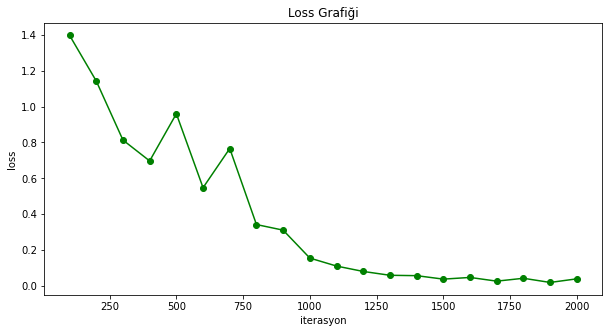

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.title("Loss Grafiği")
plt.plot(iterasyon, kayip, "-o",color="g")

plt.xlabel("iterasyon")
plt.ylabel("loss")
plt.show()

Accuracy Görselleştirme

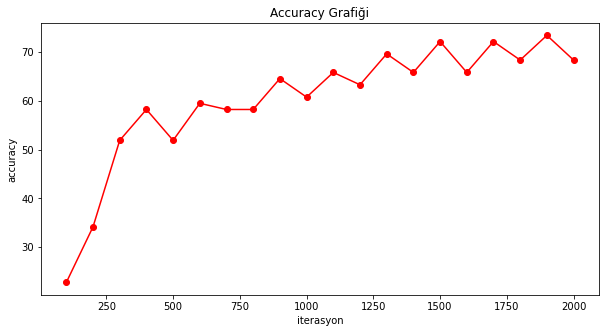

In [ ]:
plt.figure(figsize=(10,5))
plt.title("Accuracy Grafiği")

plt.plot(iterasyon, acc_list, "-o", color= "r")

plt.xlabel("iterasyon")
plt.ylabel("accuracy")
plt.show()

Test verisi ile tahmin

In [ ]:
class_name = ["Ferrari", "Mclaren", "Mercedes", "Redbull"]

In [ ]:
def visualization(model, image_numbers=6):
    was_training = model.training
    model.eval()
    resim_sayisi = 0

    with torch.no_grad():
        for i , (image, labels) in enumerate(test_loader):

            output = model(image)
            _, tahmin = torch.max(output,1)

            for j in range(image.size()[0]):
                plt.figure(figsize=(40,30))
                resim_sayisi += 1

                ax = plt.subplot(image_numbers //  2,2, resim_sayisi )
                ax.axis("off")
                ax.set_title("Tahmin : {}".format(class_name[tahmin[j]]))

                imshow(image.cpu().data[j])

                if resim_sayisi == image_numbers:
                    model.train(mode = was_training)
                    return
                 

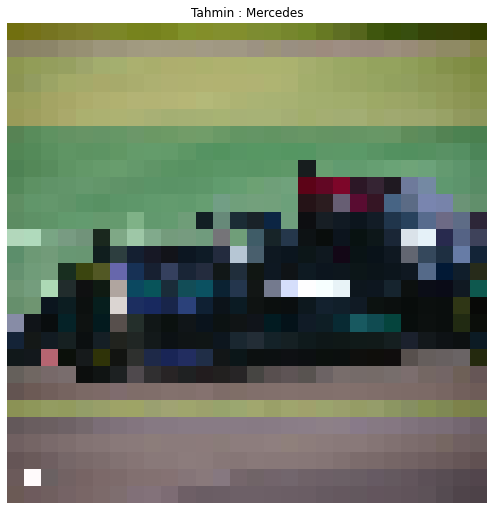

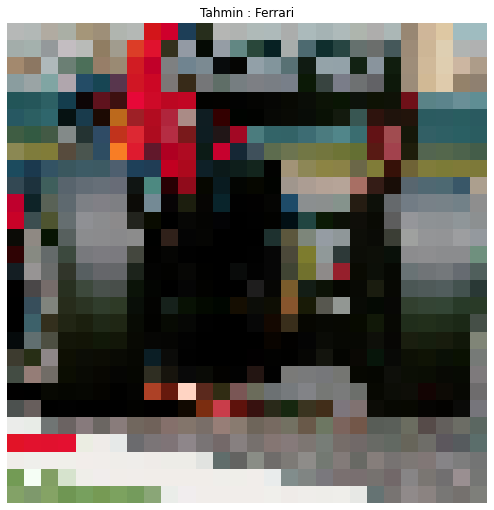

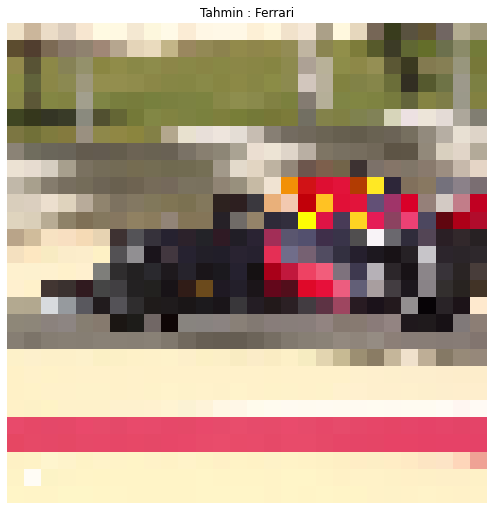

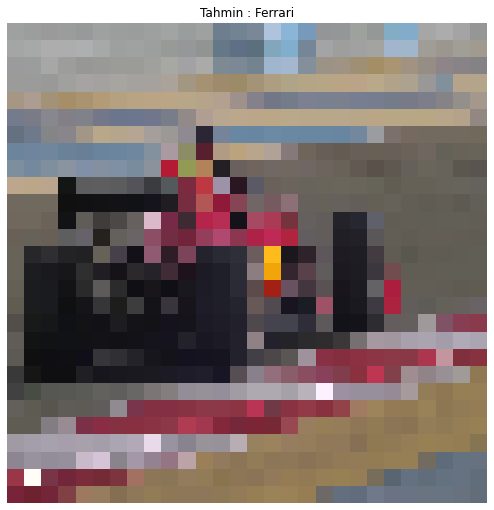

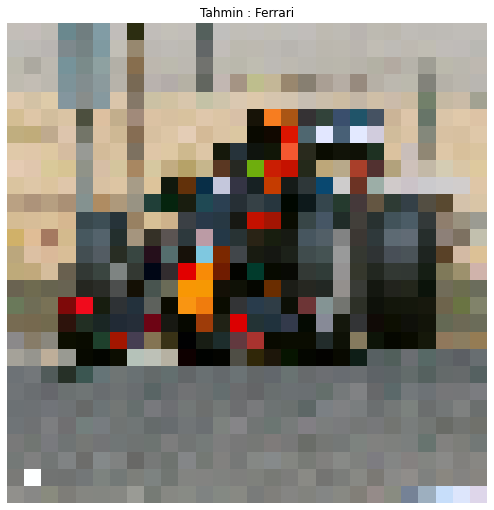

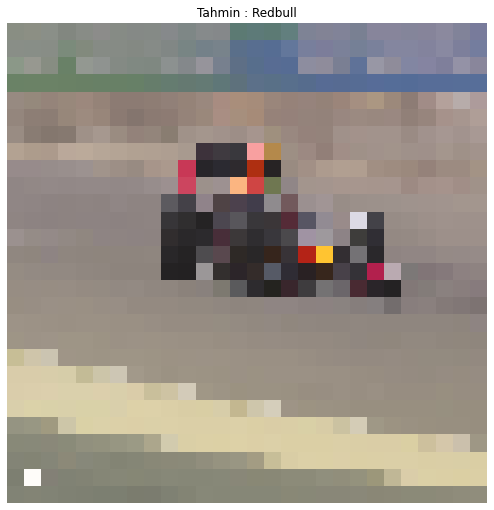

In [ ]:
visualization(model)

Sequential Model

In [ ]:
model = nn.Sequential(
    
    nn.Conv2d(in_channels=3, out_channels=4, kernel_size=(5,5)),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=(2,2)),
    
    nn.Conv2d(in_channels=4, out_channels=8, kernel_size=(3,3)),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=(2,2)),
    
    nn.Conv2d(in_channels=8, out_channels=16, kernel_size=(2,2)),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=(2,2)),
    
    nn.Conv2d(in_channels=16, out_channels=32, kernel_size=(2,2)),
    nn.ReLU(),

    nn.Flatten(),
    
    nn.Linear(in_features=32, out_features=50),
    nn.ReLU(),
    nn.Linear(in_features=50, out_features=50),
    nn.ReLU(),
    nn.Linear(in_features=50, out_features=100),
    nn.ReLU(),
    nn.Linear(in_features=100, out_features=4)
    
)

In [ ]:
model

Sequential(
  (0): Conv2d(3, 4, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(4, 8, kernel_size=(3, 3), stride=(1, 1))
  (4): ReLU()
  (5): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (6): Conv2d(8, 16, kernel_size=(2, 2), stride=(1, 1))
  (7): ReLU()
  (8): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (9): Conv2d(16, 32, kernel_size=(2, 2), stride=(1, 1))
  (10): ReLU()
  (11): Flatten(start_dim=1, end_dim=-1)
  (12): Linear(in_features=32, out_features=50, bias=True)
  (13): ReLU()
  (14): Linear(in_features=50, out_features=50, bias=True)
  (15): ReLU()
  (16): Linear(in_features=50, out_features=100, bias=True)
  (17): ReLU()
  (18): Linear(in_features=100, out_features=4, bias=True)
)

Modelin Eğitimi

In [ ]:
start = time.time()

optimizer = torch.optim.Adam(model.parameters(), lr= 0.001)
error = torch.nn.CrossEntropyLoss()
epoch = 10

for i in range(epoch):
    for j, (images, label) in enumerate (train_loader):

        optimizer.zero_grad()
        out = model(images)
        loss = error(out,label)
        loss.backward()
        optimizer.step()

        print("Epoch [{:4}  /{:4}], loss:{:4.4f}".format(i+1,j+1, loss.item()))
    
end = time.time()
print("Süre", end-start)

Epoch [   1  /   1], loss:1.4154
Epoch [   1  /   2], loss:1.3752
Epoch [   1  /   3], loss:1.3978
Epoch [   1  /   4], loss:1.3640
Epoch [   1  /   5], loss:1.3618
Epoch [   1  /   6], loss:1.4440
Epoch [   1  /   7], loss:1.3672
Epoch [   1  /   8], loss:1.4466
Epoch [   1  /   9], loss:1.3544
Epoch [   1  /  10], loss:1.3657
Epoch [   1  /  11], loss:1.3895
Epoch [   1  /  12], loss:1.4442
Epoch [   1  /  13], loss:1.3636
Epoch [   1  /  14], loss:1.3528
Epoch [   1  /  15], loss:1.3609
Epoch [   1  /  16], loss:1.3584
Epoch [   1  /  17], loss:1.3546
Epoch [   1  /  18], loss:1.3529
Epoch [   1  /  19], loss:1.4499
Epoch [   1  /  20], loss:1.3417
Epoch [   1  /  21], loss:1.3520
Epoch [   1  /  22], loss:1.3508
Epoch [   1  /  23], loss:1.3482
Epoch [   1  /  24], loss:1.4198
Epoch [   1  /  25], loss:1.4210
Epoch [   1  /  26], loss:1.3399
Epoch [   1  /  27], loss:1.3287
Epoch [   1  /  28], loss:1.4214
Epoch [   1  /  29], loss:1.4731
Epoch [   1  /  30], loss:1.3318
Epoch [   

Model Testi

In [ ]:
def dogruluk(loader, model):
    num_correct = 0
    num_samples = 0
    model.eval()

    with torch.no_grad():
        for x, y in loader:

            out = model(x)
            _, pred = out.max(1)
            num_correct += (pred==y).sum()
            num_samples += pred.size(0)
            
        print(f"Got {num_correct} / {num_samples} with accuracy {float(num_correct) / float(num_samples) * 100:.2f}")

        model.train()
        


In [ ]:
print("train doğruluk:")
dogruluk(train_loader, model)

print("test doğruluk:")
dogruluk(test_loader, model)

train doğruluk:
Got 133 / 200 with accuracy 66.50
test doğruluk:
Got 53 / 79 with accuracy 67.09


Data Augmentation

In [ ]:
veri_arttirma = transforms.Compose([
    
    transforms.ToPILImage(),
    transforms.Resize((500, 500)),
    #transforms.CenterCrop()
    #transforms.RandomCrop((32,32)),
    transforms.ColorJitter(brightness=0.5),
    transforms.RandomRotation(degrees=45),
    transforms.RandomVerticalFlip(p=0.5),
    #transforms.RandomGrayscale(p=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5,0.5,0.5], std=[0.5,0.5,0.5]),
    #transforms.GaussianBlur(kernel_size=1),
    #transforms.Grayscale(num_output_channels=3),
    #transforms.RandomPerspective(),
])

In [ ]:
dataset = veri(
    csv_file = "../../veriler/f1_classification/f111.csv",
    root_dir = "../../veriler/f1_classification",
    transform = veri_arttirma

)

In [ ]:
from torchvision.utils import save_image

foto_sayi = 0

for _ in range(1):
    
    for image, label in dataset:
        save_image(image, "../../veriler/Bolum_01_Data Augmentation/img" + str(foto_sayi)+ ".jpg")
        foto_sayi += 1

Modelin Eğitimi

In [ ]:
start = time.time()

model = Net()
print(torch.cuda.is_available())
print(torch.zeros(1).cuda())

device = torch.device("cuda:0")
model = model.to(device)

optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

error = torch.nn.CrossEntropyLoss()

from torch.optim.lr_scheduler import StepLR
lr = StepLR(optimizer, step_size=1, gamma=0.5)

epoch = 3
count = 0
loss_list = []
iteration_list = []

for i in range(epoch):
   
    lr.step()
    print("Epoch:",i, "LR", lr.get_lr())

    for j, (images, label) in enumerate (train_loader):
        images = images.to(device)
        label =  label.to(device)

        out=model(images.float())
        optimizer.zero_grad()

        loss = error(out, label)
        loss.backward()

        optimizer.step()
        count += 1

        if count % 50 == 0:
            total = 0
            correct = 0
            correct_hata = 0
            for images, label in test_loader:
                images = images.to(device)
                label = label.to(device)

                out= model(images.float())
                y_pred = torch.max(out.data, 1)[1]
                total +=  len(label)

                correct += (y_pred==label).sum()
                correct_hata += (y_pred != label).sum()

            accuray = 100 * correct / float(total)
            hata = 100 * correct_hata / float(total)

            loss_list.append(loss.data)
            iteration_list.append(count)

        if count % 50 == 0:
            print("Iteration: {:4} Loss: {:4.4f} Accuracy: {:4.4f}% Error: {:4.4f}%".format(count, loss.data, accuray, hata))
end = time.time()
print("Süre", end-start)

True
tensor([0.], device='cuda:0')
Epoch: 0 LR [0.00025]
Iteration:   50 Loss: 1.5006 Accuracy: 24.0506% Error: 75.9494%
Iteration:  100 Loss: 1.3230 Accuracy: 18.9873% Error: 81.0127%
Iteration:  150 Loss: 1.3838 Accuracy: 18.9873% Error: 81.0127%
Iteration:  200 Loss: 1.4957 Accuracy: 34.1772% Error: 65.8228%
Epoch: 1 LR [0.000125]
Iteration:  250 Loss: 1.4631 Accuracy: 41.7722% Error: 58.2278%
Iteration:  300 Loss: 0.9355 Accuracy: 41.7722% Error: 58.2278%
Iteration:  350 Loss: 0.6856 Accuracy: 43.0380% Error: 56.9620%
Iteration:  400 Loss: 1.1774 Accuracy: 45.5696% Error: 54.4304%
Epoch: 2 LR [6.25e-05]
Iteration:  450 Loss: 1.4382 Accuracy: 45.5696% Error: 54.4304%
Iteration:  500 Loss: 0.4865 Accuracy: 49.3671% Error: 50.6329%
Iteration:  550 Loss: 0.7011 Accuracy: 49.3671% Error: 50.6329%
Iteration:  600 Loss: 0.9806 Accuracy: 48.1013% Error: 51.8987%
Süre 68.18818783760071


Learning Rate Azaltma

- Modelin eğitimi

In [ ]:
start = time.time()

model = Net()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
error = torch.nn.CrossEntropyLoss()

from torch.optim.lr_scheduler import StepLR
lr = StepLR(optimizer, step_size=2, gamma=0.7)

epoch = 10
kayip=[]
count = 0
iterasyon=[]

for i in range(epoch):
    lr.step()

    print("Epoch:",i, "LR:", lr.get_lr())

    for i, (images, label) in enumerate(train_loader):

        tahmin = model(images)
        optimizer.zero_grad()
        loss = error(tahmin, label)
        loss.backward()
        optimizer.step()
        count += 1

        if count %100 ==0:
            total = 0
            correct = 0
            correct_hata = 0
            for images, label in test_loader:
                
                out= model(images)
                y_pred = torch.max(out.data, 1)[1]
                total +=  len(label)

                correct += (y_pred==label).sum()
                correct_hata += (y_pred != label).sum()
            dogruluk = 100* correct / float(total)
            hata = 100 * correct_hata / float(total)

            kayip.append(loss.data)
            iterasyon.append(count)
        if count % 100 == 0:
            print("Iteration: {:4} Loss: {:4.4f} Accuracy: {:4.4f}% Error: {:4.4f}%".format(count, loss.data, dogruluk, hata))

end = time.time()
print("Süre", end-start)




Epoch: 0 LR: [0.001]
Iteration:  100 Loss: 1.2058 Accuracy: 41.7722% Error: 58.2278%
Iteration:  200 Loss: 0.8727 Accuracy: 48.1013% Error: 51.8987%
Epoch: 1 LR: [0.00049]
Iteration:  300 Loss: 0.8653 Accuracy: 58.2278% Error: 41.7722%
Iteration:  400 Loss: 1.3610 Accuracy: 44.3038% Error: 55.6962%
Epoch: 2 LR: [0.0007]
Iteration:  500 Loss: 1.0210 Accuracy: 58.2278% Error: 41.7722%
Iteration:  600 Loss: 1.1989 Accuracy: 43.0380% Error: 56.9620%
Epoch: 3 LR: [0.000343]
Iteration:  700 Loss: 0.9626 Accuracy: 60.7595% Error: 39.2405%
Iteration:  800 Loss: 0.7934 Accuracy: 55.6962% Error: 44.3038%
Epoch: 4 LR: [0.00049]
Iteration:  900 Loss: 0.6661 Accuracy: 68.3544% Error: 31.6456%
Iteration: 1000 Loss: 0.2264 Accuracy: 62.0253% Error: 37.9747%
Epoch: 5 LR: [0.00024009999999999998]
Iteration: 1100 Loss: 0.3399 Accuracy: 68.3544% Error: 31.6456%
Iteration: 1200 Loss: 0.3031 Accuracy: 63.2911% Error: 36.7089%
Epoch: 6 LR: [0.000343]
Iteration: 1300 Loss: 0.2070 Accuracy: 70.8861% Error: 29

In [27]:
def get_num_correct(preds, label):
    return preds.argmax(dim=1).eq(labels).sum().item()

start = time.time()

parametre = dict(lr=[0.1,0.01,0.001], batch_size=[1,2] )
parametre_values = [v for v in parametre.values()] #

from itertools import product
from torch.utils.tensorboard import SummaryWriter

for lr, batch_size in product (*parametre_values):
    model = Net()

    optimizer = optim.Adam(model.parameters(), lr = lr) #
    error = torch.nn.CrossEntropyLoss()
    
    images, label = next(iter(train_loader))
    grid = torchvision.utils.make_grid(images)

    tensorboard = SummaryWriter(comment=f"batch_size={batch_size} lr={lr}")
    tensorboard.add_image("images", grid)
    tensorboard.add_graph(model, images)

    for epoch in range(5):
        total_loss = 0
        total_correct = 0

        for i, (images, label) in enumerate(train_loader):
            preds = model(images)
            loss = error(preds, labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            total_loss +=  loss.item() * batch_size
            total_correct += get_num_correct(preds, label)
        
        tensorboard.add_scalar("Loss", total_loss, epoch)
        tensorboard.add_scalar("Accuracy", total_correct / len(train_set), epoch)
        tensorboard.add_scalar("Number Correct", total_correct, epoch)
        tensorboard.add_hparams(
            { "lr":lr, "batch_size": batch_size},
            {"accuracy":total_correct/ len(train_set), "loss":total_loss}

            )

        for name, param in model.named_parameters():
            tensorboard.add_histogram(name, param, epoch)
            tensorboard.add_histogram(f"{name}.grad", param.grad, epoch)

        print("Epoch", epoch, "Total Correct", total_correct, "Loss",total_loss)

    tensorboard.close()

end = time.time()
print("Süre:",end-start)


Error: Canceled future for execute_request message before replies were done

In [ ]:
# tensorboard --logdir=runs